### Objective

Many of your friends are worried about their chances of getting admission in their dream university for pursuing MS. So, you decided to help them by building a model which is capable of predicting their chance of getting admission in their dream masters program. This model will also help in understanding which factors are important in MS admissions and what are the scores required for different tests to have better admission chances.







##Data Source

**Admission_Predict** dataset using the below link. This dataset consists of several parameters which are considered important during the application for Masters program:


|Field|Description|
|---:|:---|
|Serial No.|Serial No.|
|GRE Score|GRE Scores ( out of 340 )|
|TOEFL Score|TOEFL Scores ( out of 120 )|
|University Rating|University Rating ( out of 5 )|
|SOP|Statement of Purpose Strength ( out of 5 )|
|LOR|Letter of Recommendation Strength ( out of 5 )|
|CGPA|Undergraduate GPA ( out of 10 )|
|Research|Research Experience ( either 0 or 1 )|
|Chance of Admit|Chance of Admit ( ranging from 0 to 1 )|



  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/Admission_Predict.csv






##Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##Import Data

In [ ]:
df=pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


##Describe Data

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


##Data Preprocessing

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df=df.drop(columns=['Serial No.'],axis=1)

In [ ]:
for i in df.columns:
  df.rename(columns={i:i.strip()},inplace=True)

df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

##Data Visualization

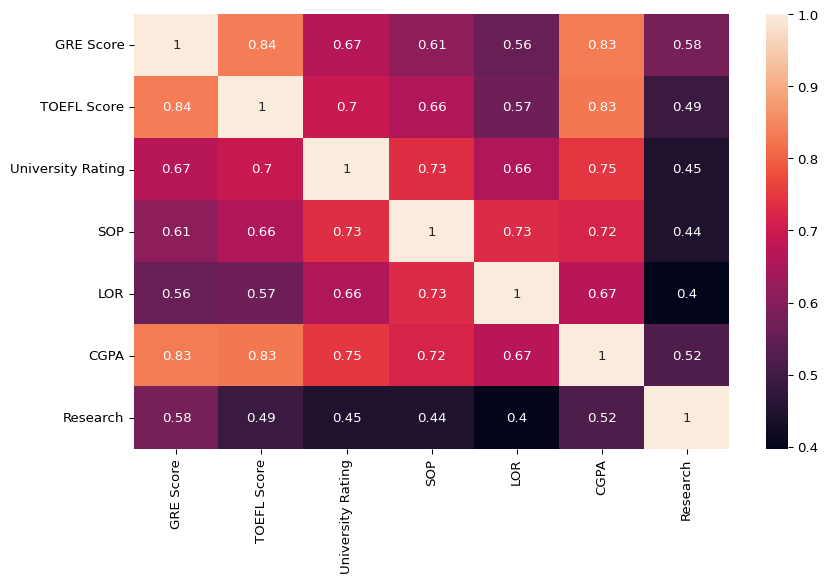

In [ ]:
cor=df.iloc[:,:-1].corr()
plt.figure(figsize = (10, 6), dpi = 96)
sns.heatmap(data = cor, annot = True) 
plt.show()

As we can see in the heat map 3 factor are most important to getting admission in an Ms program that are GRE score, TOFEL score, University Rating

###Let's Plot the scatter plot for this 3  factor

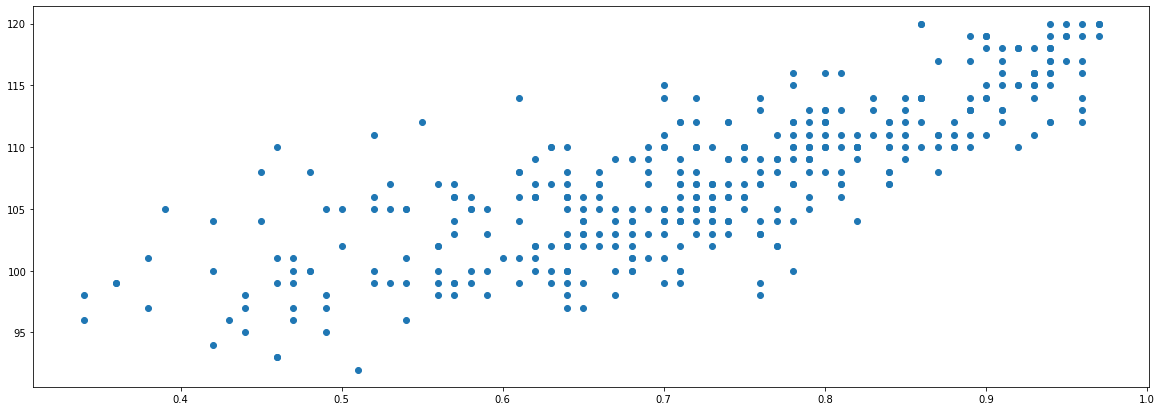

In [ ]:
plt.figure(figsize=(20,7))
plt.scatter(df["Chance of Admit"],df['TOEFL Score'])
plt.show()

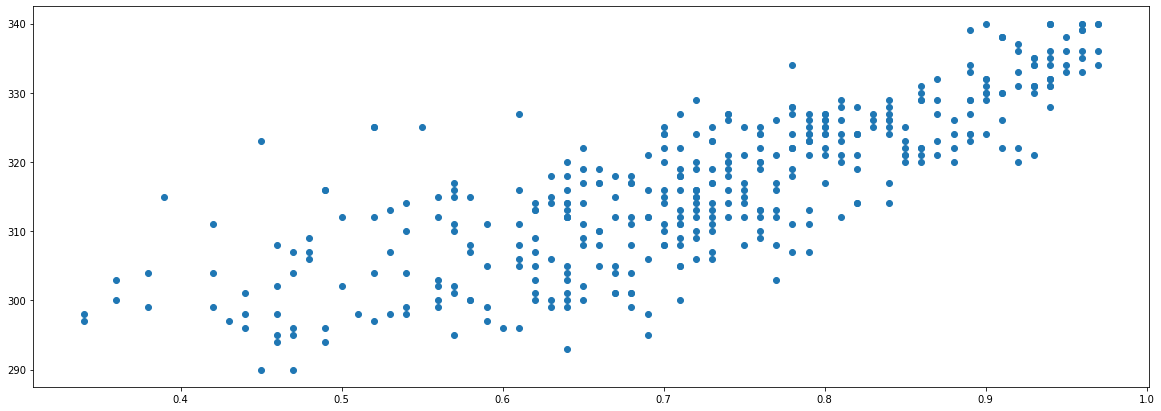

In [ ]:
plt.figure(figsize=(20,7))
plt.scatter(df["Chance of Admit"],df['GRE Score'])
plt.show()

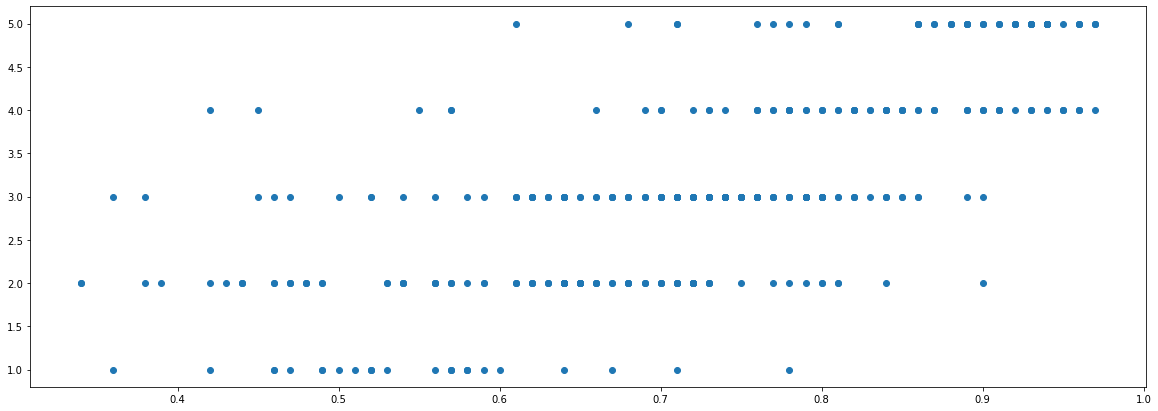

In [ ]:
plt.figure(figsize=(20,7))
plt.scatter(df["Chance of Admit"],df['University Rating'])
plt.show()



###Define Target Variable (y) and Feature Variables (X)







In [ ]:
feature=list(df.columns.values[:-1])
x=df[feature]
y=df['Chance of Admit']

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

##Modeling

In [ ]:
from sklearn.linear_model import LinearRegression

lg=LinearRegression()

lg.fit(x_train,y_train)
print(f'constant= {lg.intercept_}')

for i,j in list(zip(x.columns.values,lg.coef_)):
  print(i,'=',round(j,6))

constant= -1.2841780563001732
GRE Score = 0.00184
TOEFL Score = 0.003171
University Rating = 0.004866
SOP = 0.000995
LOR = 0.013695
CGPA = 0.117818
Research = 0.018439


##Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = lg.predict(x_train)
y_test_pred=lg.predict(x_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.802
Mean Squared Error: 0.004
Root Mean Squared Error: 0.062
Mean Absolute Error: 0.043


Test Set
--------------------------------------------------
R-squared: 0.796
Mean Squared Error: 0.005
Root Mean Squared Error: 0.068
Mean Absolute Error: 0.049


##Prediction

predict your friend's chances of getting admission into his dream university with a GRE score of 350, TOEFL score of 115, University Rating of 3, SOP of score 3, 3 LORs, CGPA of 9.8 and having research papers.

In [ ]:
lg.predict([[350, 115, 3, 3, 3, 9.8, 1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.95611334])

##Explaination

As our linear Regression model predicted that thier is 0.9561 % chance of getting admission for Ms means their is 95% chance that your friend should get admission for Ms